In [35]:
# !pip install qiskit
# !pip install pylatexenc
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec, plot_state_hinton

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Define backend
sim = Aer.get_backend('aer_simulator')

In [36]:
def ghzCircuit(inp1, inp2, inp3):
    
    qc = QuantumCircuit(3)
    qc.reset(range(3))
    
    if inp1 == 1:
        qc.x(0)
    if inp2 == 1:
        qc.x(1)
    if inp3 == 1:
        qc.x(2)
    
    qc.barrier()
    
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    
    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()

    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.



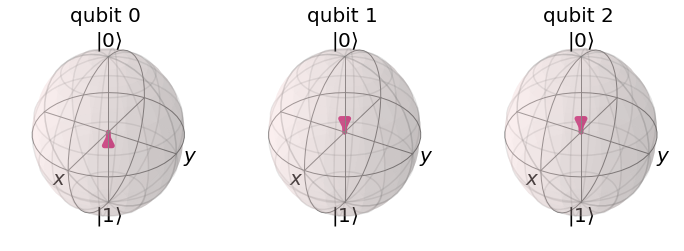

For inputs 0 0 0 Representation of GHZ States are:


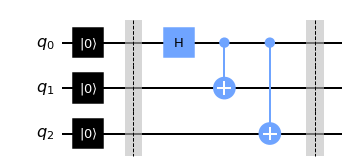

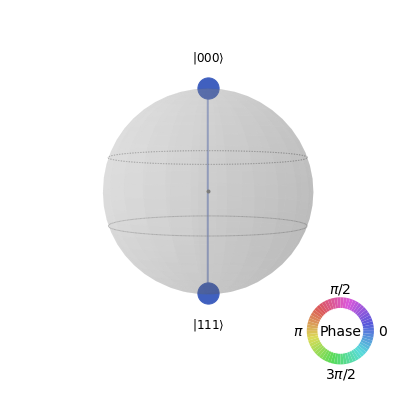

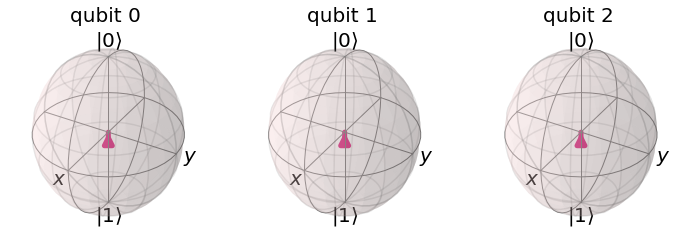

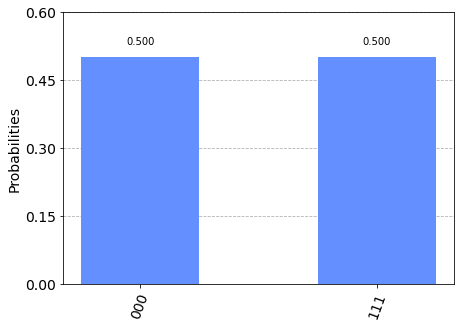

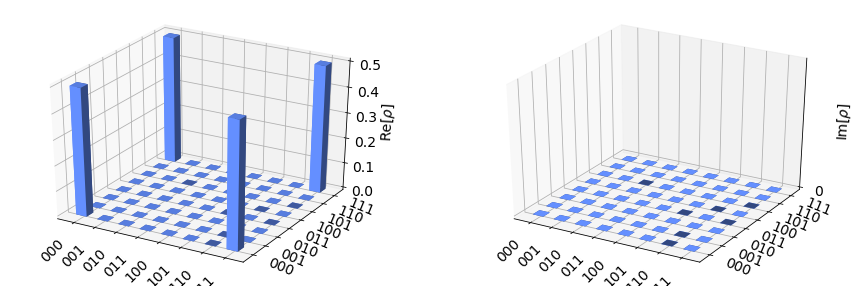

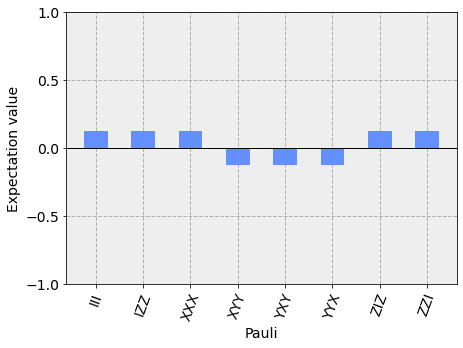

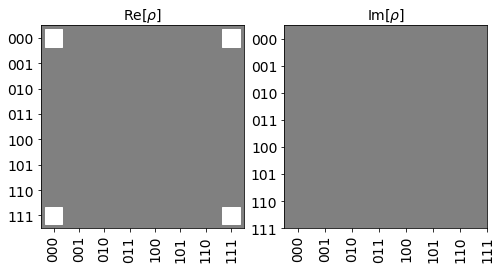



For inputs 0 0 1 Representation of GHZ States are:


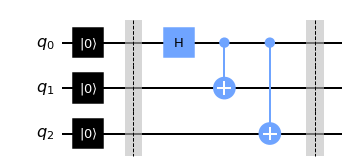

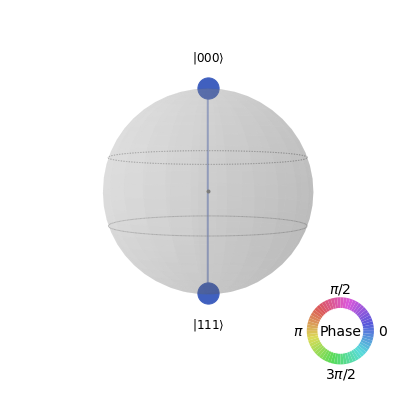

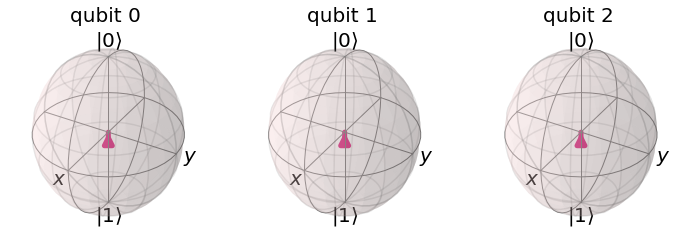

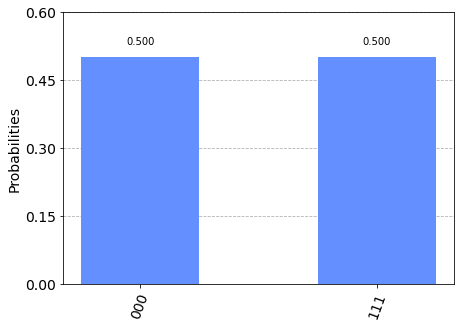

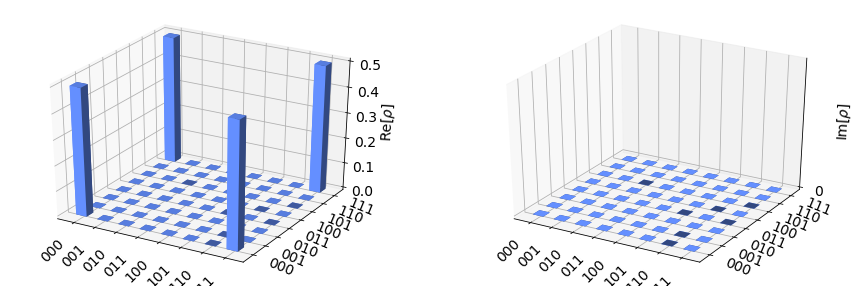

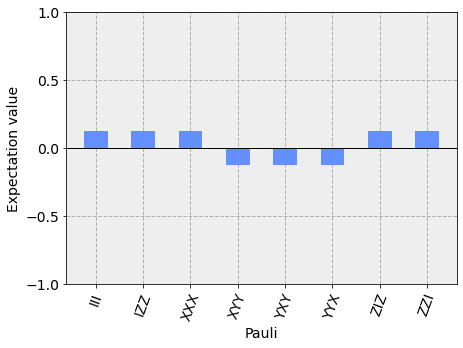

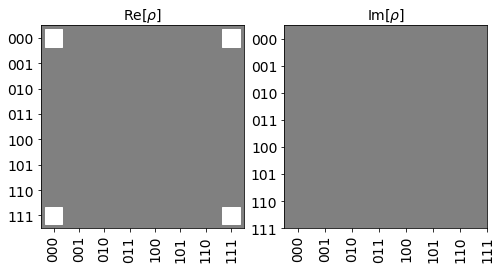



For inputs 0 1 0 Representation of GHZ States are:


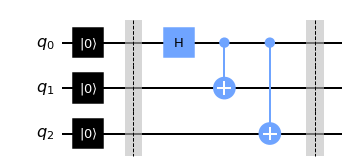

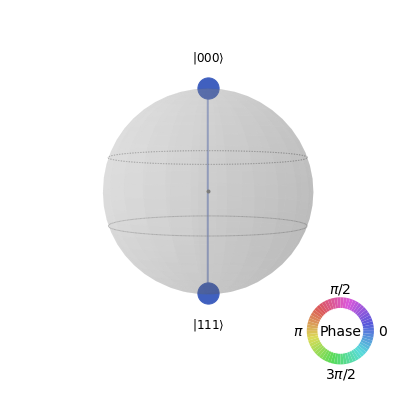

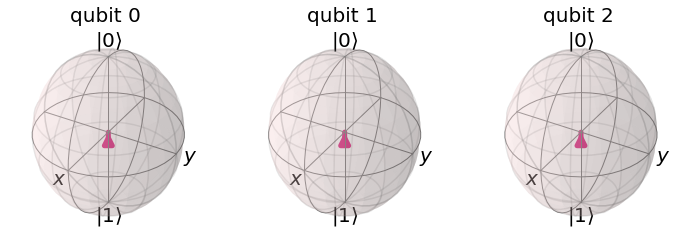

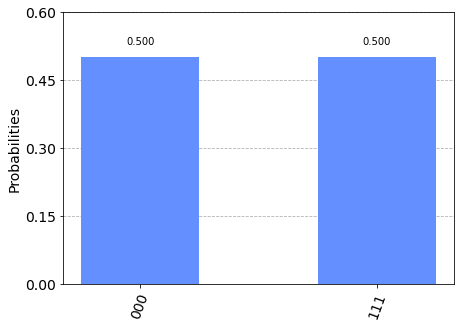

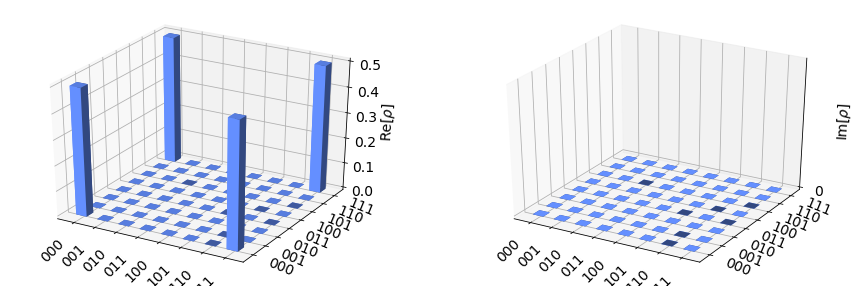

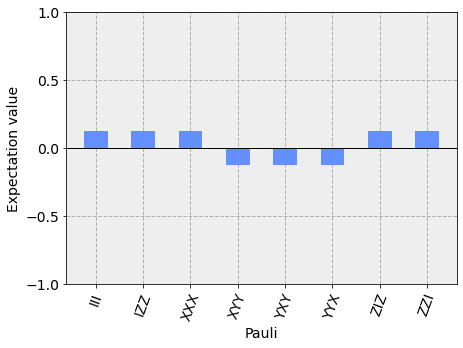

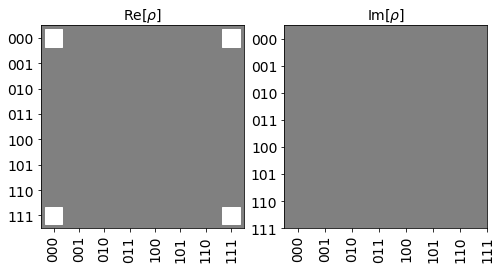



For inputs 0 1 1 Representation of GHZ States are:


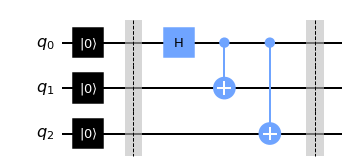

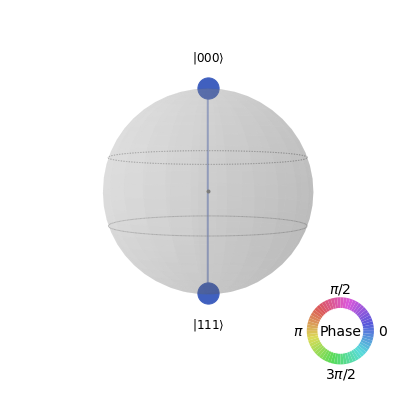

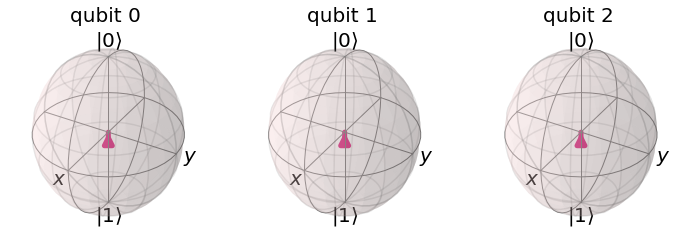

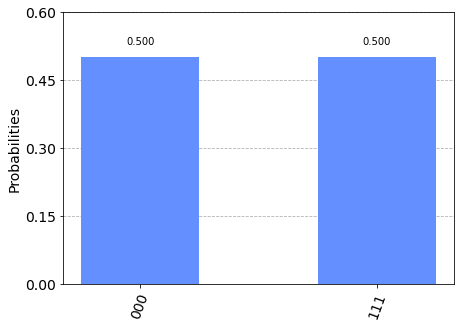

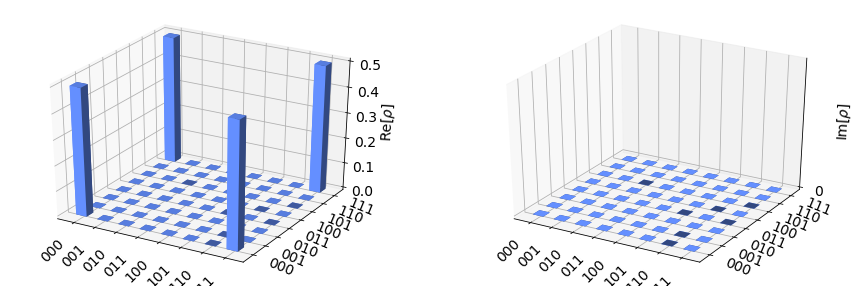

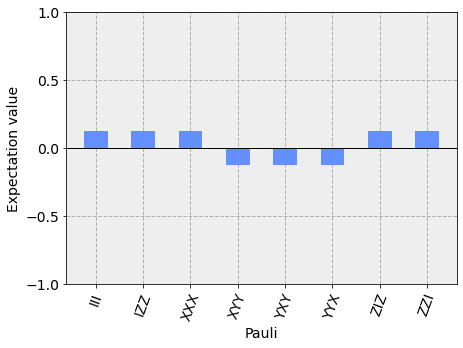

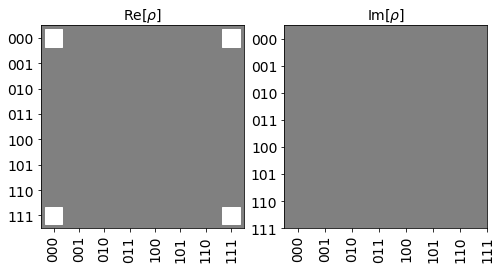



For inputs 1 0 0 Representation of GHZ States are:


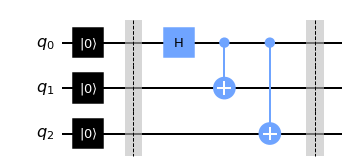

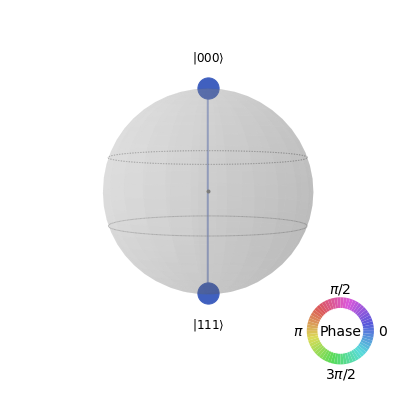

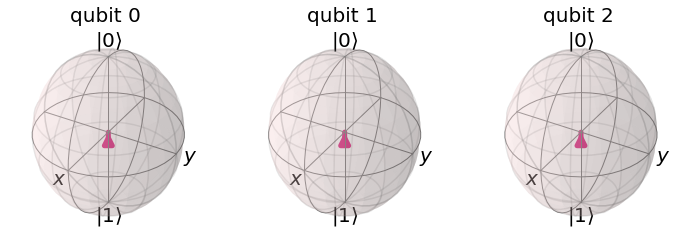

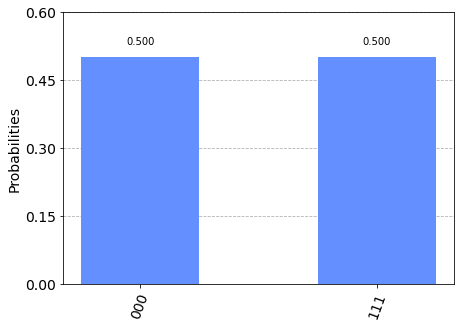

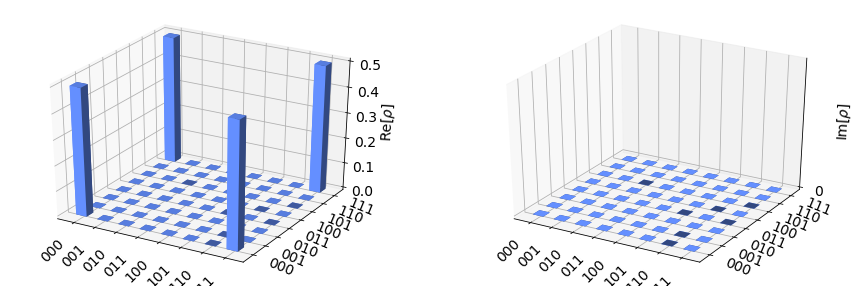

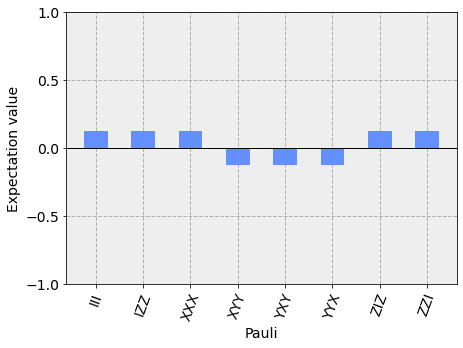

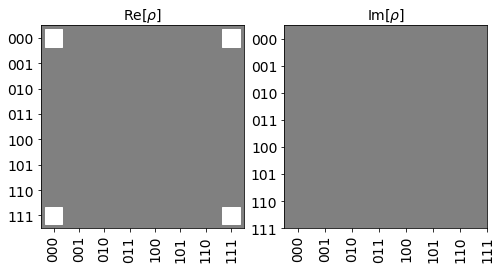



For inputs 1 0 1 Representation of GHZ States are:


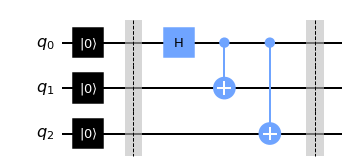

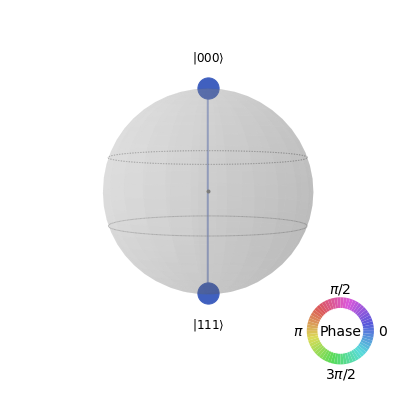

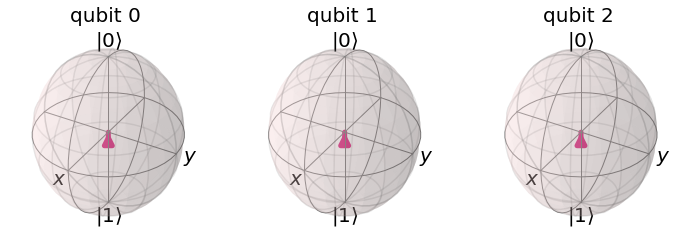

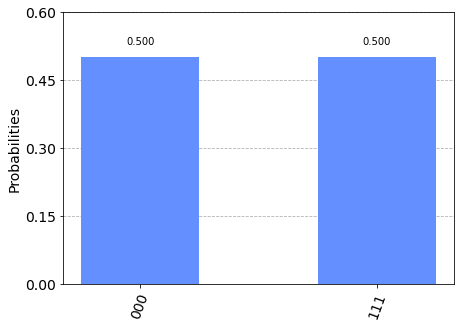

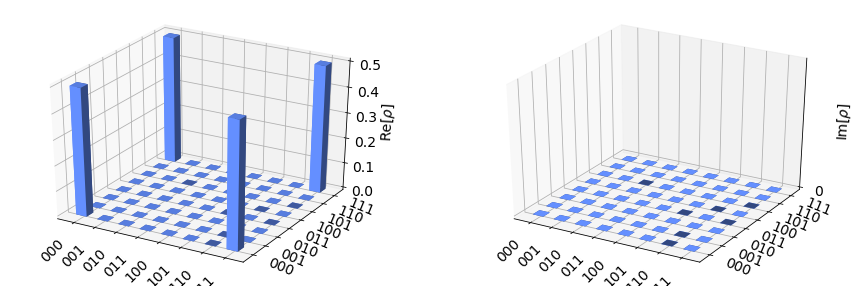

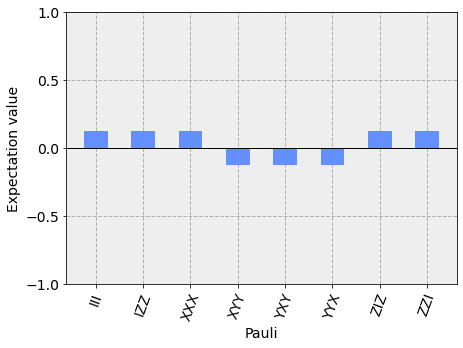

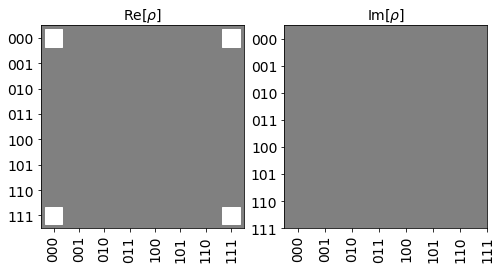



For inputs 1 1 0 Representation of GHZ States are:


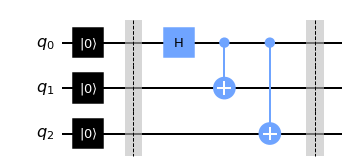

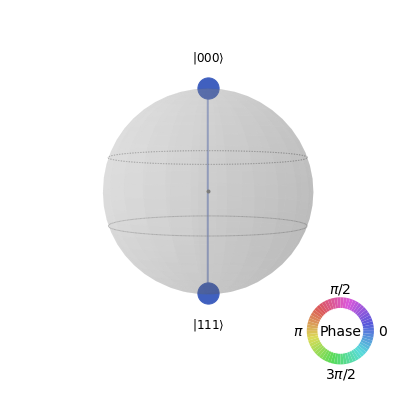

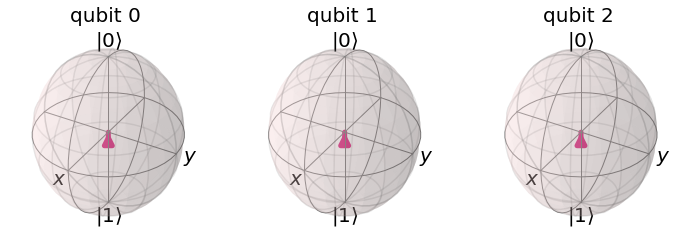

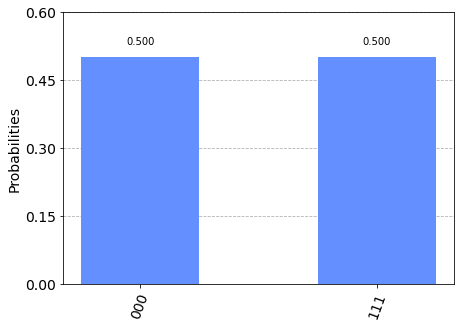

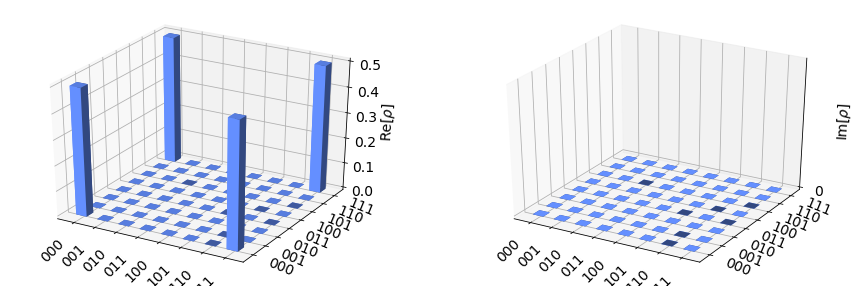

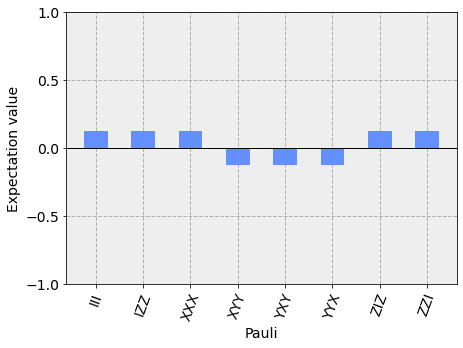

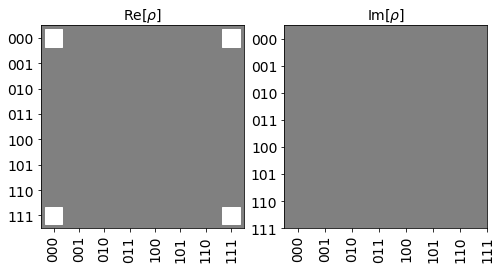



For inputs 1 1 1 Representation of GHZ States are:


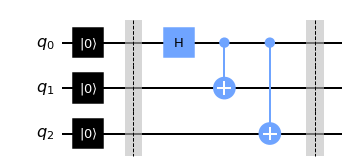

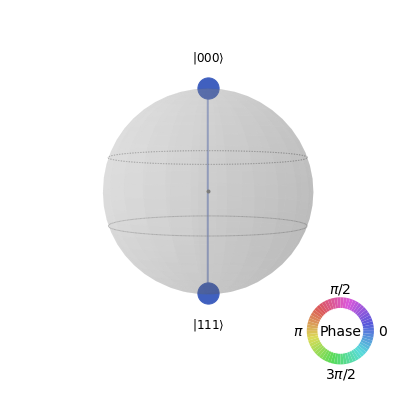

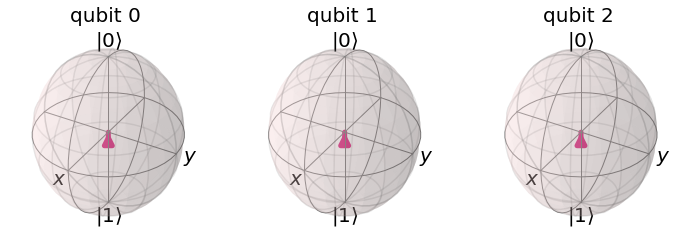

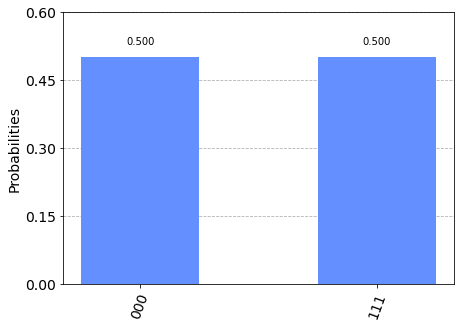

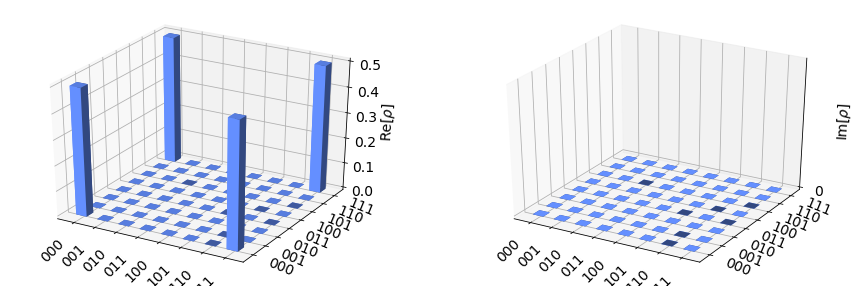

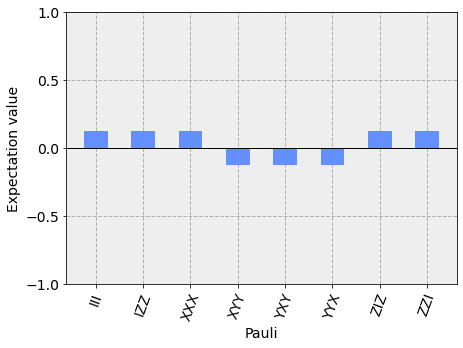

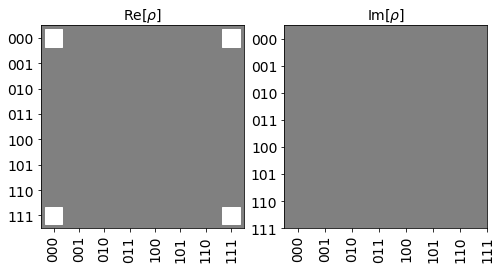

In [38]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')

inp1 = 0
inp2 = 1
inp3 = 1

qc, state, result = ghzCircuit(inp1, inp2, inp3)

display(plot_bloch_multivector(state))

for inp3 in ['0','1']:
    for inp2 in ['0','1']:
        for inp1 in ['0','1']:
            qc, state, result = ghzCircuit(inp1, inp2, inp3)

            print('For inputs',inp3,inp2,inp1,'Representation of GHZ States are:')

            # Draw the quantum circuit
            display(qc.draw(output = 'mpl'))

            # Plot states on QSphere
            display(plot_state_qsphere(state))

            # Plot states on Bloch Multivector
            display(plot_bloch_multivector(state))

            # Plot histogram
            display(plot_histogram(result.get_counts()))

            # Plot state matrix like a city
            display(plot_state_city(state))

            # Represent state matix using Pauli operators as the basis
            display(plot_state_paulivec(state))

            # Plot state matrix as Hinton representation
            display(plot_state_hinton(state))

            print('\n')